In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin_ncg
import matplotlib.pyplot as plt

In [2]:
W = np.load('../rnndata/weight_hh_l0.npy')
b = np.load('../rnndata/bias_hh_l0.npy')
bi = np.load('../rnndata/bias_ih_l0.npy')

N = W.shape[0]

def f(x):
    r = np.tanh(W@x+b+bi)
    dx = -x+r
    return 0.5*(dx.T@dx)

## optimization functions / helpers
def f(x):
#     r = np.tanh(x)
#     dx = -x+W@r
    r = np.tanh(W@x+b+bi)
    dx = -x+r
    return 0.5*(dx.T@dx)

def grad_f(x):
#     r = np.tanh(x)
#     dx = -x+W@r
    r = np.tanh(W@x+b+bi)
    dx = -x+r
    d1 = (1-np.power(r,2)).reshape(N,1)
    h = ((W.T * (d1@np.ones([1,N]))) - np.identity(N))
    return h@dx

def hess_f(x):
#     r = np.tanh(x)
#     dx = -x+W@r
    r = np.tanh(W@x+b+bi)
    dx = -x+r
    d1 = (1-np.power(r,2)).reshape(N,1)
    h = ((W.T * (d1@np.ones([1,N]))) - np.identity(N))
    return h@h.T

## projection function with SVD
def PCA_project(X, modes, plot_SVs=True):
    # SVD of X
    U, s, VT = np.linalg.svd(X)
    
    # construct S matrix with S_vector -- there must be a better way to do this?
    S = np.zeros([U.shape[0],VT.shape[0]])
    for i in range(modes):
        S[i,i] = s[i]

#     print("shapes", X.shape, U.shape,S.shape,VT[:,:modes].shape, (U@S@VT[:,:modes]).shape)
    if plot_SVs:
        plt.plot(np.log(s))
        plt.show()
    return U@S@VT[:,:modes]

In [3]:
trajectory_p.shape

NameError: name 'trajectory_p' is not defined

In [8]:
#trajectory = pd.read_csv('../rnndata/worldtour.csv', header=None).values.T
import h5py

data =h5py.File('states.hdf5','r')
list(data.keys())
trajectory = data['states1'] # for example

## get trajectories
# traj0 = np.loadtxt(open("../rnndata/0perturb.csv", "rb"), delimiter=",", skiprows=1).T
# traj1 = np.loadtxt(open("../rnndata/1perturb.csv", "rb"), delimiter=",", skiprows=1).T
# traj2 = np.loadtxt(open("../rnndata/2perturb.csv", "rb"), delimiter=",", skiprows=1).T

# datasets = [traj0.T,traj1.T,traj2.T]
# n_dsets = len(datasets)
# traj_c = np.concatenate(datasets).T

trajectory_p = PCA_project(trajectory.T,3)

plt.figure(1)

# traj_projected_split = np.split(traj_projected,n_dsets)
# for i in range(len(traj_projected_split)):
#     plt.subplot(311+i)
#     for traj in traj_projected_split[i].T:
#         plt.plot(np.arange(traj.shape[0]), traj)

for traj in trajectory_p.T:
    plt.plot(np.arange(traj.shape[0]), traj)

plt.show()

/Users/kevinstephen/anaconda2/envs/sindy/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



OSError: Unable to open file (unable to open file: name = 'states.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
## use trajectories to find nearby fixed pts
# xs = traj_c
xopts = []
for x in trajectory.T:
    xopt = fmin_ncg(f, x, grad_f, fhess=hess_f, avextol=1e-10)
    xopts.append(xopt)
    
xopts = np.array(xopts)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 32
         Gradient evaluations: 36
         Hessian evaluations: 17
         Current function value: 0.021818
         Iterations: 3
         Function evaluations: 42
         Gradient evaluations: 33
         Hessian evaluations: 4
         Current function value: 0.010717
         Iterations: 5
         Function evaluations: 28
         Gradient evaluations: 21
         Hessian evaluations: 6
         Current function value: 0.004821
         Iterations: 4
         Function evaluations: 27
         Gradient evaluations: 19
         Hessian evaluations: 5
         Current function value: 0.002041
         Iterations: 3
         Function evaluations: 46
         Gradient evaluations: 38


         Current function value: 0.003843
         Iterations: 6
         Function evaluations: 50
         Gradient evaluations: 45
         Hessian evaluations: 7
         Current function value: 0.000270
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 24
         Hessian evaluations: 7
         Current function value: 0.000214
         Iterations: 5
         Function evaluations: 29
         Gradient evaluations: 22
         Hessian evaluations: 6
         Current function value: 0.000454
         Iterations: 3
         Function evaluations: 26
         Gradient evaluations: 17
         Hessian evaluations: 4
         Current function value: 0.000129
         Iterations: 4
         Function evaluations: 27
         Gradient evaluations: 19
         Hessian evaluations: 5
         Current function value: 0.000078
         Iterations: 2
         Function evaluations: 44
         Gradient evaluations: 35
         Hessian evaluations: 3
         C

         Current function value: 0.000800
         Iterations: 8
         Function evaluations: 56
         Gradient evaluations: 53
         Hessian evaluations: 9
         Current function value: 0.002431
         Iterations: 6
         Function evaluations: 31
         Gradient evaluations: 25
         Hessian evaluations: 7
         Current function value: 0.000060
         Iterations: 6
         Function evaluations: 48
         Gradient evaluations: 43
         Hessian evaluations: 7
         Current function value: 0.000359
         Iterations: 5
         Function evaluations: 30
         Gradient evaluations: 23
         Hessian evaluations: 6
         Current function value: 0.000352
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 20
         Hessian evaluations: 5
         Current function value: 0.000083
         Iterations: 3
         Function evaluations: 26
         Gradient evaluations: 17
         Hessian evaluations: 4
         C

         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 100
         Hessian evaluations: 4
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 52
         Gradient evaluations: 45
         Hessian evaluations: 5
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 59
         Gradient evaluations: 49
         Hessian evaluations: 3
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 48
         Gradient evaluations: 37
         Hessian evaluations: 2
         Current function value: 0.000003
         Iterations: 25
         Function evaluations: 80
         Gradient evaluations: 94
         Hessian evaluations: 26
         Current function value: 0.002962
         Iterations: 6
         Function evaluations: 51
         Gradient evaluations: 46
         Hessian evaluations: 7
      

         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 56
         Gradient evaluations: 51
         Hessian evaluations: 8
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 53
         Gradient evaluations: 43
         Hessian evaluations: 2
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 28
         Gradient evaluations: 19
         Hessian evaluations: 4
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 50
         Gradient evaluations: 42
         Hessian evaluations: 5
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 54
         Gradient evaluations: 46
         Hessian evaluations: 4
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 51
         Gradient evaluations: 43
         Hessian evaluations: 5
         C

         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 24
         Hessian evaluations: 7
         Current function value: 0.000013
         Iterations: 22
         Function evaluations: 52
         Gradient evaluations: 62
         Hessian evaluations: 23
         Current function value: 0.003842
         Iterations: 6
         Function evaluations: 49
         Gradient evaluations: 44
         Hessian evaluations: 7
         Current function value: 0.000270
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 24
         Hessian evaluations: 7
         Current function value: 0.000214
         Iterations: 5
         Function evaluations: 29
         Gradient evaluations: 22
         Hessian evaluations: 6
         Current function value: 0.000454
         Iterations: 3
         Function evaluations: 26
         Gradient evaluations: 17
         Hessian evaluations: 4
        

         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 65
         Gradient evaluations: 60
         Hessian evaluations: 7
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 62
         Gradient evaluations: 61
         Hessian evaluations: 12
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 72
         Gradient evaluations: 72
         Hessian evaluations: 13
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 70
         Gradient evaluations: 62
         Hessian evaluations: 5
         Current function value: 0.000004
         Iterations: 13
         Function evaluations: 51
         Gradient evaluations: 54
         Hessian evaluations: 14
         Current function value: 0.001791
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 24
         Hessian evaluations: 7
    

         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 53
         Gradient evaluations: 45
         Hessian evaluations: 4
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 67
         Gradient evaluations: 59
         Hessian evaluations: 4
         Current function value: 0.000843
         Iterations: 9
         Function evaluations: 49
         Gradient evaluations: 47
         Hessian evaluations: 10
         Current function value: 0.005776
         Iterations: 6
         Function evaluations: 45
         Gradient evaluations: 40
         Hessian evaluations: 7
         Current function value: 0.000518
         Iterations: 9
         Function evaluations: 35
         Gradient evaluations: 32
         Hessian evaluations: 10
         Current function value: 0.000996
         Iterations: 4
         Function evaluations: 46
         Gradient evaluations: 39
         Hessian evaluations: 5
        

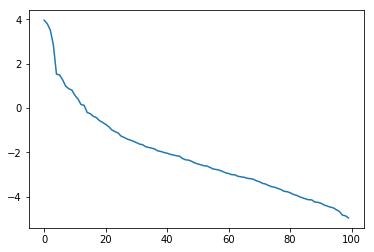

shapes: (320, 3) (320, 3)


In [6]:
## concatenate trajectories and fixed points, project into 3D, and separate
divide = trajectory.shape[1]
concat=np.hstack([trajectory,xopts.T])
proj_concat = PCA_project(concat.T,3)
trajectory_p = proj_concat[:divide]
# traj_projected_split = np.split(traj_projected,3)
xopts_p = proj_concat[divide:]
print('shapes:', trajectory_p.shape, xopts_p.shape)

## alternately, SVD traj_c and project fixed points accordingly. ## not sure this is correct.
# U, s, VT = np.linalg.svd(traj_c)
# modes = 3

# S = np.zeros([U.shape[0],VT.shape[0]])
# for i in range(modes):
#     S[i,i] = s[i]

# xopts_projected2 = (U.T[:3,:]@xopts.T).T/s[:3]

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import random

r = lambda: random.randint(0,255)
color = '#%02X%02X%02X' % (r(),r(),r())

# fixed points projected by U of trajectories
x = pd.Series(xopts_p[:,0])
y = pd.Series(xopts_p[:,1])
z = pd.Series(xopts_p[:,2])

fps = go.Scatter3d(x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.3
    )
)

color = '#%02X%02X%02X' % (r(),r(),r())

x = pd.Series(trajectory_p[:,0])
y = pd.Series(trajectory_p[:,1])
z = pd.Series(trajectory_p[:,2])

trace = go.Scatter3d(x=x, y=y, z=z,
    marker=dict(
        size=4,
        color=color,
        colorscale='Viridis',
    ),
    line=dict(
        color=color,
        width=1
    )
)

data = [fps,trace]
    
layout = dict(
    width=800,
    height=700,
    autosize=True,
    title='3 bit flip flop',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='3bit_fps_plz', height=700, validate=False)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~KevinStephen/0 or inside your plot.ly account where it is named '3bit_fps_plz'


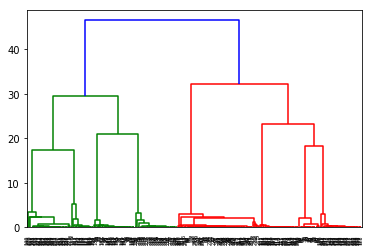

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# number of clusters
k = 7

# computes the distance between points, merges closest based on the method
Z=linkage(xopts, method='ward');

# draws the resulting dendrogram from the clustering done by linkage
dendrogram(Z);
plt.show()
# gives the cluster that each original point belongs to.
idx = fcluster(Z,k,'maxclust');

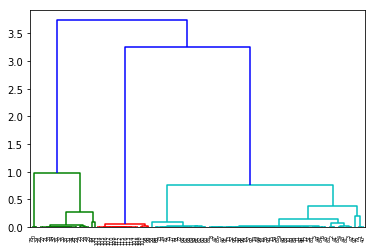

In [34]:
Z=linkage(xopts_projected, method='ward');

# draws the resulting dendrogram from the clustering done by linkage
dendrogram(Z);
plt.show()